# Introdução a Teoria da Informação - Simulação AP2

Alunos: 

João Vitor de Oliveira Fraga - 537377 

Abraão de Carvalho Albuquerque - 538286

As funções utilizadas nessa simulação estão no arquivo "functions_mobilecom.py", onde todas estão comentadas explicando o que é feito para cada processo.

Temos que o diagrama de bloco do processo realizado nessa simulação é:
![Diagrama de Blocos](diagrama.png)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions_mobilecom import *
np.random.seed(12)

In [2]:
bandwidth , transmit_power, d_min, K_0 = 100e6, 1, 1, 1e-20 # Em MHz, mW, metros, mW/Hz respectivamente
area = 1000 # Área de 1 km^2
num_ues = 13 # Número de UEs pré-definido
num_aps = np.array([1, 4, 9, 16, 25, 36, 49, 64]) # Número de APs pré-definido, sendo quadrados perfeitos
num_channels = np.arange(1, 6) # Número de canais pré-definido
monte_carlo = 400 # Número de simulações de Monte Carlo

É dito que para os itens (a), (b), (e) e (f) é necessário definir um valor fixo de M APs. Devido ao fato de ser necessário que no $10º$ percentil se obtenha uma capacidade de $100$ Mbps, portanto, após fazer algumas simulações com diferentes valores de APs, definimos que para esses itens $M = 64$ APs.

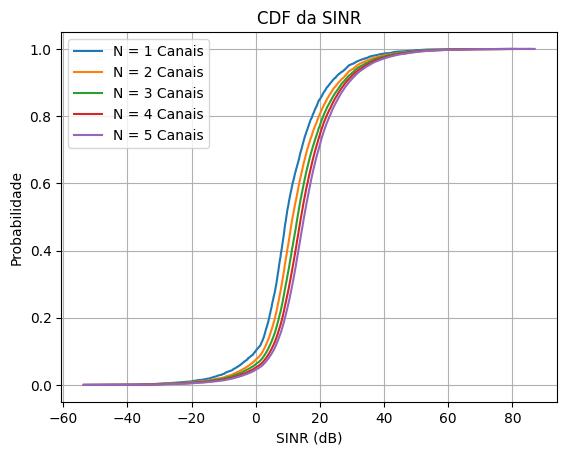

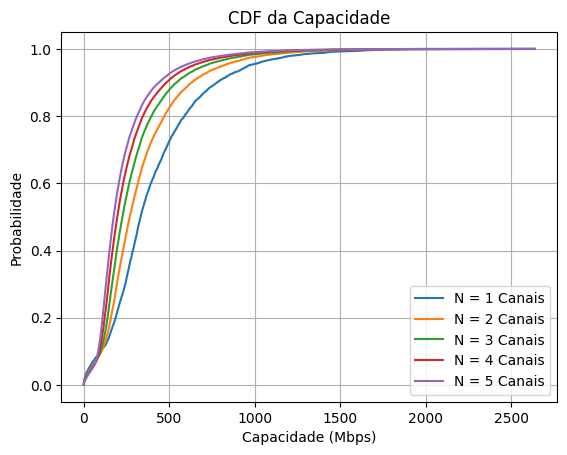

In [3]:
# Vamos considerar um valor fixo de 64 APs
num_aps_caso1 = 64

sinr_acum_caso1 = np.array([])
capacity_acum_caso1 = np.array([])

# Acumuladores para o 10º percentil
sinr_10_acum_caso1 = []
capacity_10_acum_caso1 = []
channel_list = []


plt.figure(1)  # Figura para o CDF da SINR
plt.figure(2)  # Figura para o CDF da Capacidade

for channel in num_channels:
    for iterations in range(monte_carlo):
        # Calcula a SINR e a Capacidade para o caso de K = 13 UEs, M = 64 APs e N = {1, 2, 3, 4, 5} canais
        sinr_caso1 = calculate_sinr(bandwidth, K_0, num_aps_caso1, num_ues, channel, transmit_power, area)
        capacity_caso1 = find_capacity(sinr_caso1, bandwidth, channel)

        # Armazena os valores
        sinr_acum_caso1 = np.append(sinr_acum_caso1, sinr_caso1) # SINR em dB
        capacity_acum_caso1 = np.append(capacity_acum_caso1, capacity_caso1) # Capacidade em bps
        
    # Calcula o 10º percentil
    sinr_10_caso1 = np.percentile(np.sort(lin2db(sinr_acum_caso1)), 10) # SINR em dB
    capacity_10_caso1 = (np.percentile(np.sort(capacity_acum_caso1), 10))/1e6 # Capacidade em bps

    # Armazena os valores para plotar depois
    sinr_10_acum_caso1.append(sinr_10_caso1)
    capacity_10_acum_caso1.append(capacity_10_caso1)  
    channel_list.append(channel)


   # Plota o CDF da SINR na primeira figura
    plt.figure(1)
    plt.plot(np.sort(lin2db(sinr_acum_caso1)), np.arange(0, len(sinr_acum_caso1))/len(sinr_acum_caso1), label='N = {} Canais'.format(channel))

    # Plota o CDF da Capacidade na segunda figura
    plt.figure(2)
    plt.plot(np.sort(capacity_acum_caso1)/1e6, np.arange(0, len(capacity_acum_caso1))/len(capacity_acum_caso1), label='N = {} Canais'.format(channel))

# Configurações para o gráfico de SINR
plt.figure(1)
plt.title('CDF da SINR')
plt.xlabel('SINR (dB)')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()

# Configurações para o gráfico de Capacidade
plt.figure(2)
plt.title('CDF da Capacidade')
plt.xlabel('Capacidade (Mbps)')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()

# Exibe ambos os gráficos
plt.show()

Conseguimos analisar que quanto maior o valor de $N$ a nossa SINR também cresce, isso se deve ao fato de que quanto maior o número de canais, menos usuários eu vou ter em um determinado canal, diminuindo assim a interferência, dessa maneira aumentando a SINR.

Já em relação a capacidade, quanto maior o valor de $N$ menor a capacidade obtida, isso ocorre pois na fórmula da capacidade temos:

$C = B_c log_2(1+SINR)$, onde $B_c = \frac{B_t}{N}$. 

Sendo $B_t$ nossa banda total, portanto, apesar do fato da SINR crescer com o aumento de canal, por ela ser argumento de uma função $log_2$, sua influência não será tao grande quanto a de $B_c$, que diminui a partir do aumento de $N$.

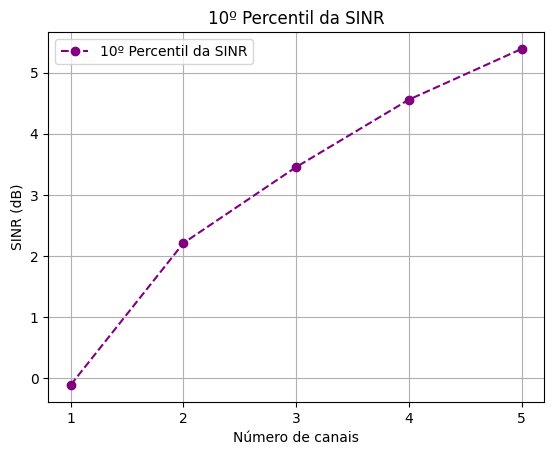

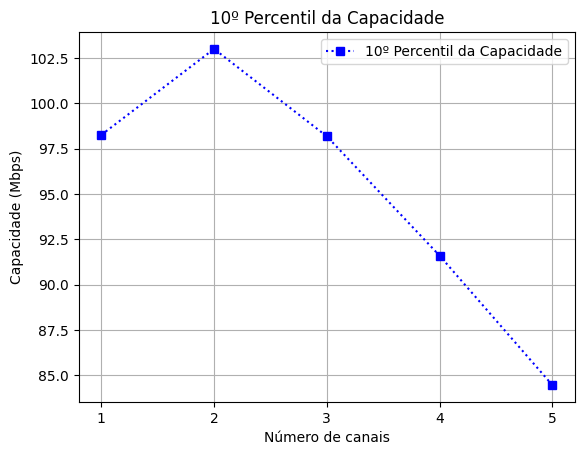

In [4]:
# Plota o 10º percentil da SINR 
plt.figure()
plt.plot(channel_list, sinr_10_acum_caso1, marker='o', linestyle='--', color='purple', label='10º Percentil da SINR')
plt.title('10º Percentil da SINR')
plt.xlabel('Número de canais')
plt.ylabel('SINR (dB)')
plt.xticks(channel_list)
plt.grid()
plt.legend()

# Plota o 10º percentil da Capacidade 
plt.figure()
plt.plot(channel_list, capacity_10_acum_caso1, marker='s', linestyle=':', color='blue', label='10º Percentil da Capacidade')
plt.title('10º Percentil da Capacidade')
plt.xlabel('Número de canais')
plt.ylabel('Capacidade (Mbps)')
plt.grid()
plt.xticks(channel_list)
plt.legend()

plt.show()

Podemos ver que no 10º percentil o valor da SINR cresce bastante, isso se deve ao fato da diminuição da interferência.


Já sobre a capacidade, conseguimos obter no 10º percentil o QoS desejado de 100Mbps para $N=2$, e vemos que para o 10º percentil. Além do mais, a medida que meu $N$ aumenta, a minha capacidade diminui, mostrando que nossa simulação está correta.

Já para os itens (c), (d), (g) e (h) é dito para definirmos um valor fixo de $N$ canais e alterar somente a quantidade de APs, pensando no caso anterior onde conseguimos obter os $100$ Mpbs na borda da célula quando $N=2$, iremos utilizar para essas questões $N=2$

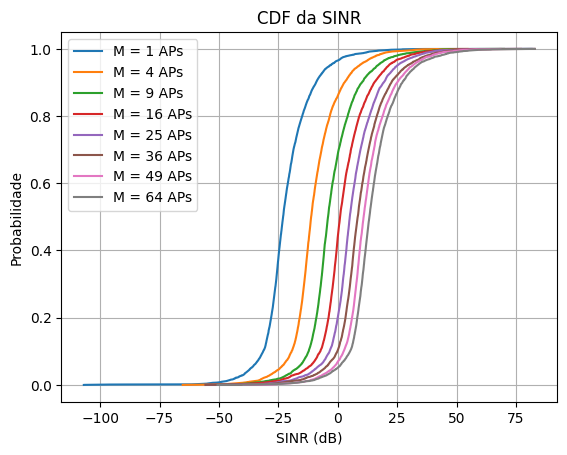

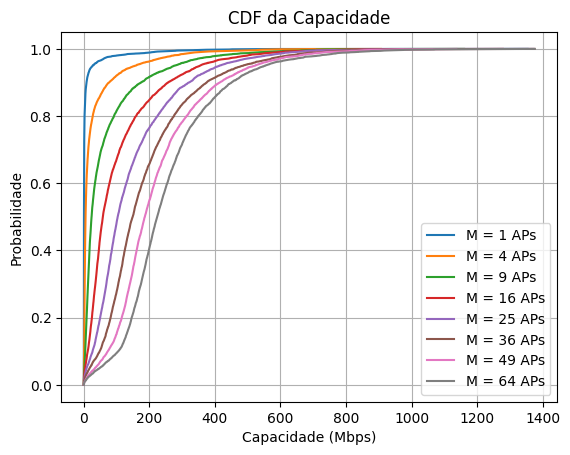

In [5]:
# Vamos considerar um valor fixo de 2 Canais
num_channels_caso2 = 2

# Acumuladores para o 10º percentil
sinr_10_acum_caso2 = []
capacity_10_acum_caso2 = []
aps_list = []

# Inicializa as figuras
plt.figure(1)  # Figura para o CDF da SINR
plt.figure(2)  # Figura para o CDF da Capacidade

for aps in num_aps:
    # Reinicia os acumuladores para cada número de APs
    sinr_acum_caso2 = np.array([])
    capacity_acum_caso2 = np.array([])

    for iterations in range(monte_carlo):
        sinr_caso2 = calculate_sinr(bandwidth, K_0, aps, num_ues, num_channels_caso2, transmit_power, area)
        capacity_caso2 = find_capacity(sinr_caso2, bandwidth, num_channels_caso2)

        sinr_acum_caso2 = np.append(sinr_acum_caso2, sinr_caso2)
        capacity_acum_caso2 = np.append(capacity_acum_caso2, capacity_caso2)
        
    # Calcula o 10º percentil
    sinr_10_caso2 = np.percentile(np.sort(lin2db(sinr_acum_caso2)), 10)
    capacity_10_caso2 = np.percentile(np.sort(capacity_acum_caso2), 10) / 1e6  # Convertendo para Mbps

    # Armazena os valores para plotar depois
    sinr_10_acum_caso2.append(sinr_10_caso2)
    capacity_10_acum_caso2.append(capacity_10_caso2)
    aps_list.append(aps)

    # Plota o CDF da SINR na primeira figura
    plt.figure(1)
    plt.plot(np.sort(lin2db(sinr_acum_caso2)), np.arange(0, len(sinr_acum_caso2))/len(sinr_acum_caso2), label='M = {} APs'.format(aps))

    # Plota o CDF da Capacidade na segunda figura
    plt.figure(2)
    plt.plot(np.sort(capacity_acum_caso2) / 1e6, np.arange(0, len(capacity_acum_caso2))/len(capacity_acum_caso2), label='M = {} APs'.format(aps))

# Configurações para o gráfico de SINR
plt.figure(1)
plt.title('CDF da SINR')
plt.xlabel('SINR (dB)')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()

# Configurações para o gráfico de Capacidade
plt.figure(2)
plt.title('CDF da Capacidade')
plt.xlabel('Capacidade (Mbps)')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()

# Exibe ambos os gráficos
plt.show()


Podemos ver que quanto maior o número de APs melhor é tanto a minha SINR quanto a minha capacidade. Para o caso que estamos trabalhando, a potência recebida ($p_r$) depende apenas da distância entre a UE e a AP, como eu estou aumentando a quantidade de APs dentro de uma mesma área, a distância que cada usuário fica da AP mais próxima, por exemplo, diminui ao passo que eu aumento a sua quantidade, por isso tanto a SINR quanto a Capacidade aumentam em relação ao aumento do número de APs.

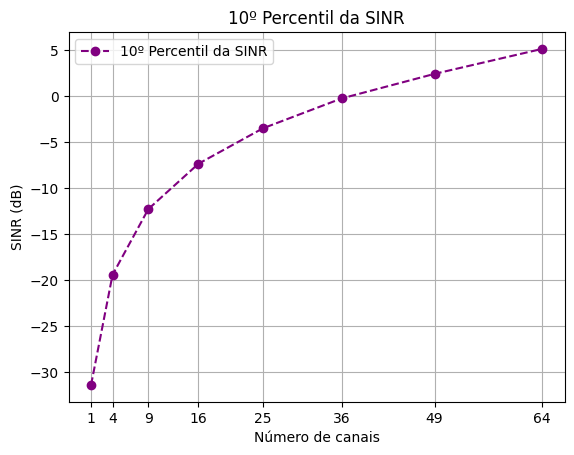

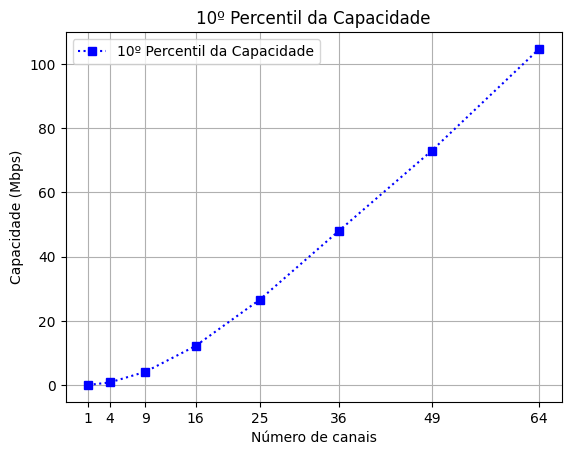

In [6]:
# Plota o 10º percentil da SINR 
plt.figure()
plt.plot(aps_list, sinr_10_acum_caso2, marker='o', linestyle='--', color='purple', label='10º Percentil da SINR')
plt.title('10º Percentil da SINR')
plt.xlabel('Número de canais')
plt.ylabel('SINR (dB)')
plt.xticks(aps_list)
plt.grid()
plt.legend()

# Plota o 10º percentil da Capacidade 
plt.figure()
plt.plot(aps_list, capacity_10_acum_caso2, marker='s', linestyle=':', color='blue', label='10º Percentil da Capacidade')
plt.title('10º Percentil da Capacidade')
plt.xlabel('Número de canais')
plt.ylabel('Capacidade (Mbps)')
plt.grid()
plt.xticks(aps_list)
plt.legend()

plt.show()


Em relação ao 10º percentil podemos ver seu crescimento quase que exponencial, e verificamos que os valores de capacidade obtindo para $64$ APs e $2$ canais desse gráfico quanto do gráfico da capacidade anterior apresentam o mesmo valor, sendo esse o resultado esperado.

# Conclusão

Podemos então concluir que para $13$ UEs, o valor minimo para conseguir atingir o QoS é de $64$ APs e $2$ canais, caso o número de UEs aumente, podemos avaliar alguns ajustes possíveis de serem feitos, como o aumento do número de APs, aumento da largura de banda, aumento na potência de transmissão, contudo, se levarmos isso para a vida real, sairia bastante caro.

Temos então algumas técnicas para contornarmos esse problema, como:

- Alocação de canal, seja ortogonal ou de maior ganho, já que para esse exemplo usamos uma alocação aleatório;

- Controle de potência para diminuir a interferência que um UE causa no outro.

Com isso em mente, podemos sofisticar ainda mais nosso simulador para que ele atenta qualquer tipo de métrica exigido.